<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/07_02_%EC%8B%AC%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D(%EB%94%A5%EB%9F%AC%EB%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 인공 신경망에 층을 추가하여 데이터셋을 분류하면 딥러닝(심층신경망)

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로우 연산을 결정적으로 만듭니다
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 케라스 API에서 패선 MNIST 데이터셋을 불러옴
# 훈련세트와 테스트셋을 만듦

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split

# 이미지 픽셀값 0~155 범위에서 0~1사이로 변환
train_scaled = train_input/255.0
# 28*28 크기의 2차원 배열을 만들어 784 크기의 1차원 배열로 펼침
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)
# 20%의 훈련세트와 검증세트로 분할

In [3]:
print(test_input.shape, test_target.shape) # 10,000 테스트용
print(train_scaled.shape, train_target.shape) # 48,000 훈련용
print(val_scaled.shape, val_target.shape) # 12,000 검증용

(10000, 28, 28) (10000,)
(48000, 784) (48000,)
(12000, 784) (12000,)


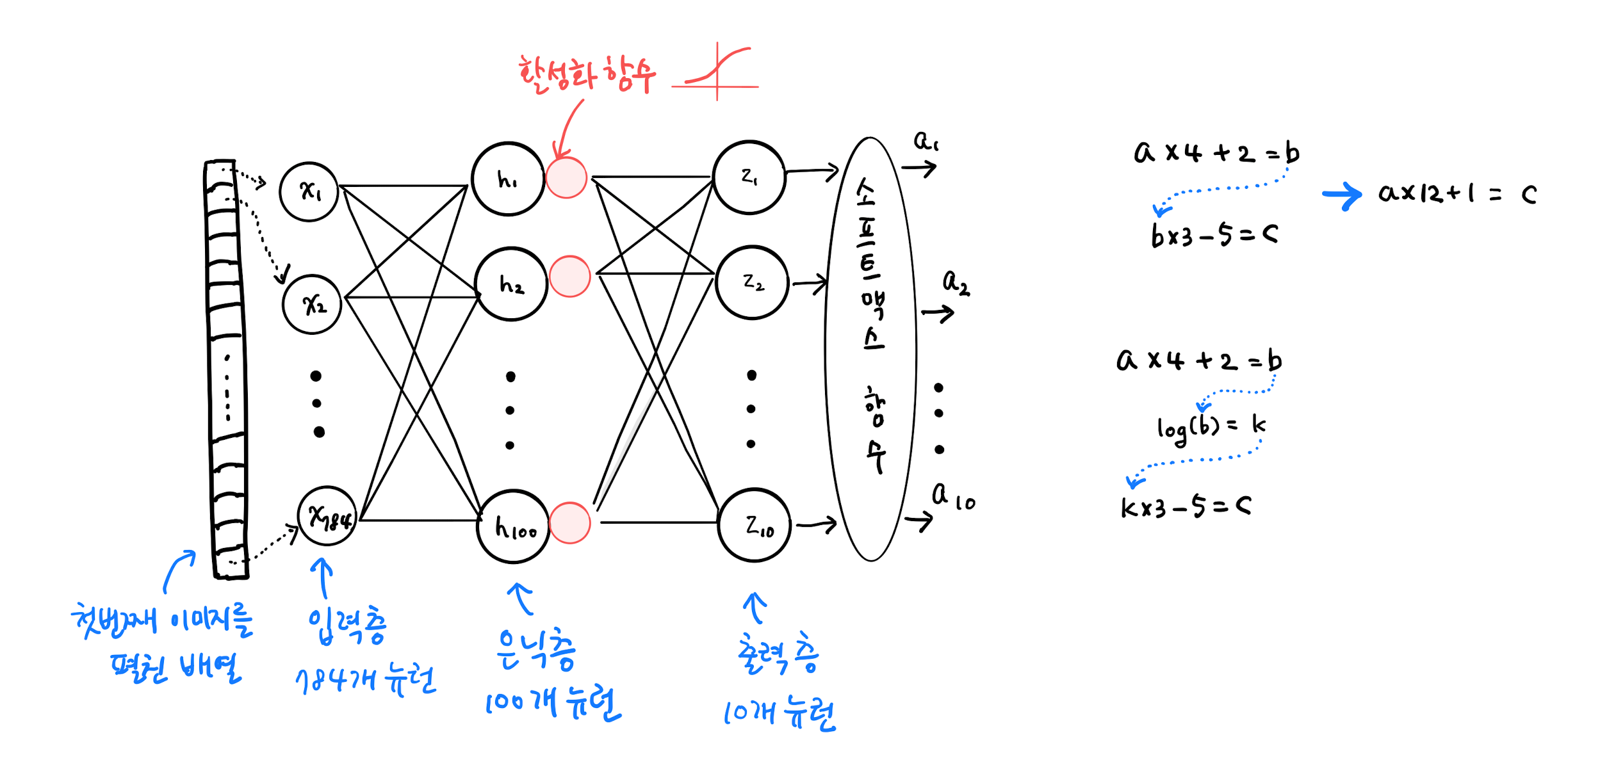

In [ ]:
# 인공 신경망 모델에 2개의 레이어를 추가해보자
# 전에 만든 신경망 모델과 다른 점은 입력-출력 층 사이에 밀집층이 추가된 것
# -> 은닉층(hidden layer)
# 은닉층에는 주황색 원으로 활성화 함수가 표시되어있다.
# 활성화 함수는 신경망 층의 선형 방정식 계산 값에 적용하는 함수이다.
# 출력층에 적용하는 활성화 함수는 종류가 제한되어있음
# 이진분류(시그모이드), 다중분류(소프트맥스) : 분류를 위한
# 은닉층은 활성화 함수가 자유롭다 (대표적 : 시그모이드,볼 렐루 함수....)
# a*4+2*b -> b*3-5=c 라고 했을 때  b가 하는 일은 임시용 -> a*12+1=c

# 신경망도 마찬가지로 은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈
# 선형 계산을 적당하게 비선형적으로 비틀어줘야 함
# 그래야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있다.
# a*4+2*b -> log(b)=k -> k*3-5=c 라고 했을 때 log(b)=k 가 하는 일은?

In [8]:
# 시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한
# 출력층을 캐라스 Dense 클래스로 만들어보자.
dense1 = keras.layers.Dense(100,activation='sigmoid', input_shape=(784,))# 활성화함수 : 시그모이드
#input_shape=(784,) 입력의 크기 필수
# dense1의 목표 : 784개의 입력을 시그모이드 함수를 이용해서 100개로 만들어봐~
# https://gooopy.tistory.com/52

# dense1이 은닉층, 100개의 뉴런을 가진 밀집층,
# 몇개의 뉴런이 필요할지는 경험적으로 기입
# 제약사항으로는 적어도 출력층의 뉴런보다는 많게 만들어야한다.
# 클래스 10개에 대한 확률을 예측해야 하는데 은닉층의 뉴런이 10개 이하면 안됨

dense2 = keras.layers.Dense(10,activation='softmax')# 활성화함수 : 소프트맥스
# dense2는 출력층으로 설정(10개의 클래스를 분류하므로 10개의 뉴런을 둠)
# https://wikidocs.net/120089

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 심층 신경망 만들기 ( 순차적으로 적용하기 위한 모델 )
model = keras.Sequential([dense1,dense2])

# 위에서 만든 dense1,2를 Sequential 클래스에 추가하여 심층(deep)신경망을 만듦
# dense1,2를 리스트로 만들어 전달
# 주의 : 뒤에가 출력층! dense2를 설정
# 인공 신경망의 강력한 성능은 층을 추가하여
# 입력데이터에 대해 연속적인 학습을 진행 -> 2개 이상 층 추가 가능

In [11]:
model.summary() # 층에 대한 유용한 정보가 나옴

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델이 들어있는 층이 순서대로 나옴
# 맨 처음 추가한 은닉층~ 출력층 순서대로 나옴
# 층 이름(클래스), 출력크기, 모델 파라미터 개수
# 층 이름을 지정하지 않으면 캐라스가 자동으로 Dense라고 이름붙임
# 출력크기 : (None(샘플의 개수, 아직 정의되지 않음),100)
#           -> 캐라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한번에
#           사용하지 않고 잘게 나누어 여러번에 걸쳐 경사 하강법 단계를 수행 (미니배치 경사 하강법)
#           캐라스의 미니배치 기본 크기는 32개

# 이 값은 fit() 메서드에서 batch_size 매개변수로 변경 가능
# 따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록
# None으로 설정이 최선

# 신경망 층에서 입력되거나 출력되는 배열의 첫번째 차원을 배치 자원이라고 부름

# 출력 크기(None,100) -> 은닉층의 뉴런 개수는 100개이므로 100개의 출력이 나옴
# -> 샘플마다 784개의 픽셀 값이 은닉 층을 통과하면서 100개의 특성으로 압축
# 마지막으로 파라미터 개수가 출력된 784*100+100 = 78,500
# 공식 암기!
# 입력개수 * 출력개수(절편) + 출력개수(절편) = 파라미터 수

In [ ]:
# 두번째 층의 출력 크기 (None,10) -> 뉴런개수 : 10개
# 파라미터는 100 * 10 +10 = 1010개

# 맨 아래 있는 Non-trainable params : 0 (0.00 B)는 훈련되지 않는 파라미터
# (간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층의 파라미터)

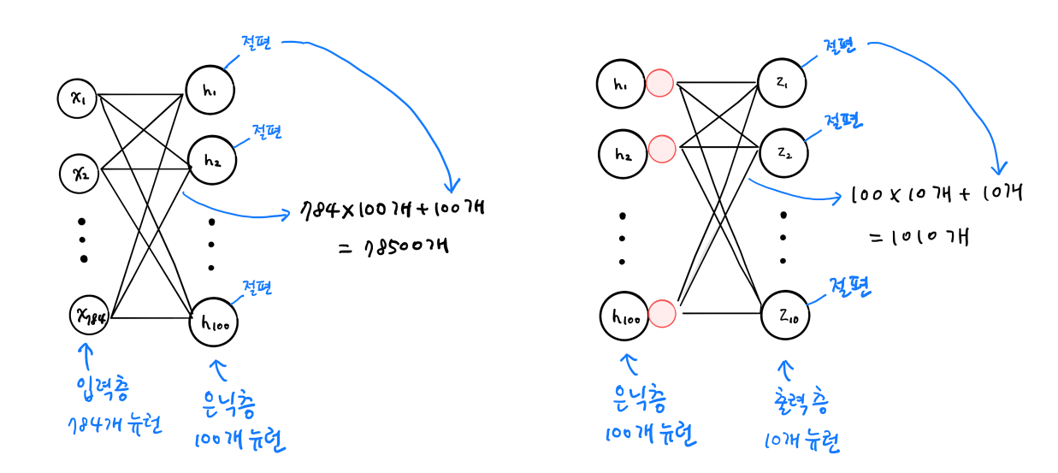

In [13]:
# 모델을 만들면서 층을 추가하는 방법
# Sequential클래스에 층을 추가하는 다른 방법
# 앞에 2개의 Dense는 따로 저장하여 쓸 일이 없기 때문에
# 아래 코드처럼 Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만드는 경우가 많다.

model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
                                                        # name='hidden' 레이어 이름 정의(영어만!)
    keras.layers.Dense(10, activation='softmax', name='output')], name='패션 MNIST 모델')
                                                                  # 모델의 이름
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 층(layer) 추가시 가장 편한 방법! add()
model = keras.Sequential() # 새로운 모델 생성
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 모델 훈련 시작!
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7523 - loss: 0.7681
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8480 - loss: 0.4248
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8614 - loss: 0.3843
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8691 - loss: 0.3593
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8759 - loss: 0.3407


In [17]:
# 1개의 층으로만 돌렸을 때는 정확도가 85.37 %
# 2개의 층으로 돌렸을 경우 정확도가 87.40 %로 향상됨

# 훈련결과를 보면 훈련 세트에 대한 성능이 추가된 층이 성능을 향상시켰다는 것을 잘 알 수 있다.
model.evaluate(val_scaled,val_target) # 검증점수 : 87.26%

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8726 - loss: 0.3562


[0.35895925760269165, 0.8694166541099548]

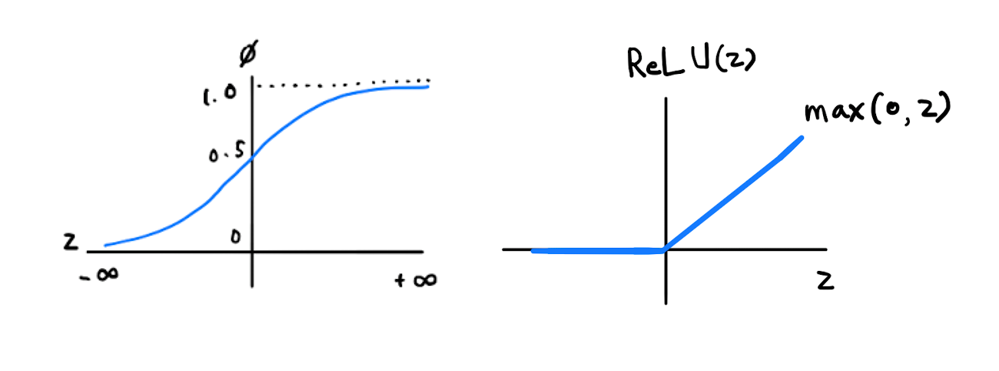

In [ ]:
# 초창기 인공 신경망의 은닉층에서 많이 사용된 활성화 함수는 시그모이드 함수였지만
# 단점이 오른쪽, 왼쪽 끝으로 갈 수록 그래프가 누워, 올바른 출력을 만드는데 신속하게 대응하지 못함.
# 특히 층이 많은 심층 신경망 일수록 그 효과가 누적되어 학습을 더 어렵게 만듦.

# 개선을 위해서 다른 종류의 활성화 함수가 제안되었는데, 바로 렐루(ReLU) 함수!
# 렐루 함수는 입력이 양수일 경우 마치 활성화 함수가 없는 것 처럼
# 그냥 입력을 통과시키고 음수일 경우 0으로 만듦.
# 렐루 함수는 max(0,z)와 같이 씀 -> z가 0보다 크면 z를 출력하고 0보다 작으면 0을 출력

# 렐루 함수는 특히 이미지 처리에 좋은 성능을 보임
# 은닉층의 활성화함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에
# 케라스에서 제공하는 편리한 층 하나를 더 알아볼 필요가 있다. -> Flatten(이미지 픽셀용)
# Flatten(플래튼) : 단조롭게 하다 (28*28 - 784가 아니라 그냥 28,28로 입력함)
# 클래스는 배치 자원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 함
# -> 가중치, 절편 없음

# 절편 : 직선이 x축과 만나는 점의 x좌표(x절편) 및 y축과 만나는 점의 y좌표(y절편)를 통틀어 이르는 말
# 하지만 플래튼 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라고 부름
# 입력층 바로 뒤에 플래튼 층 추가

In [18]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #입력층 바로 뒤에 플래튼 층 추가
# 플래튼 클래스에 포함된 파라미터는 0개로 캐라스의 플래튼 층을 신경망 모델에 추가하면
# 입력값의 차원을 짐작할 수 있는 것이 장점이 됨

# (None,784) -> 784개의 입력이 첫번째 은닉층에 전달됨을 알 수 있다.
model.add(keras.layers.Dense(100,activation='relu')) # 렐루층 : True/False를 1단계에서 검사
model.add(keras.layers.Dense(10,activation='softmax')) # 소프트맥스층 : 다중분류
model.summary() # 여기까지가 딥러닝 모델 생성 끝

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 훈련 데이터를 준비해서 모델 훈련 시작
# reshape() 메서드 제외함 -> 2차원 해상도 값을 그대로 사용해봄
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [20]:
print(test_input.shape,test_target.shape) # 플래튼을 사용하려고 픽셀값 조정 안함

(10000, 28, 28) (10000,)


In [22]:
print(train_scaled.shape,train_target.shape) # 플래튼을 사용하려고 픽셀값 조정 안함

(48000, 28, 28) (48000,)


In [23]:
print(val_scaled.shape,val_target.shape) # 플래튼을 사용하려고 픽셀값 조정 안함

(12000, 28, 28) (12000,)


In [25]:
# 순차적인 모델을 생성한 후에 컴파일을 통해서 빠른 처리를 위함
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련 시작! 에포크 5번
model.fit(train_scaled,train_target,epochs=5)
# 전 시그모이드(87.26%)와 비교해보면 조금 향상됨 88.47% 약 25초 걸림

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7642 - loss: 0.6766
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8497 - loss: 0.4091
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8674 - loss: 0.3621
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8781 - loss: 0.3353
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8847 - loss: 0.3184


In [26]:
model.evaluate(val_scaled,val_target) # 검증점수 전(87.26%)과 비교해보면 안 좋아짐(85.84%)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8584 - loss: 0.3976


[0.39790526032447815, 0.8600833415985107]

In [33]:
# 옵티마이저 : 최적화

# 하이퍼 파라미터는 모델이 학습하지 않아 사람이 지정해 주어야 하는 파라미터
# 신경망에는 특히 하이퍼 파라미터가 많다.
# 전에는 하나의 은닉층을 추가하였지만 여러개의 은닉층을 추가할 수도 있다.
# 추가할 은닉층의 개수는 모델이 학습하는 것이 아니라 우리가 지정해 주어야할 하이퍼파라미터
# 은닉층의 뉴런 개수도 우리가 지정하는 것이 하이퍼 파라미터임 ( 활성화함수, 층의 종류 포함)

# 캐라스는 기본적으로 미니배치 경사 하강법을 사용하며 미니배치 개수는 32개라고 했다.
# 이를 조정하는 batch_size로 하이퍼 파라미터
# fit() 메서드의 에포트 매개변수도 하이퍼 파라미터임.
# -> 반복한 횟수에 따라 다른 모델이 만들어짐.

# 마지막으로 complile() 메서드에서는 캐라스의 기본 경사 하강법 알고리즘인
# RMSprop(Root Mean Squure Propagation의 약자로, 알엠에스프롭(RMSProp)이라고 읽습니다.)
# 케라스는 다양한 종류의 경사 하강법을 제공하는데 이를 옵티마이저(optimizer:최적화)라고 부름
#   -> 학습률 또한 조정할 하이퍼파라미터임.

# 처음부터 모델을 구성하고 각종 하이퍼파라미터의 최적값을 찾는 것은 어려운 작업임.

# 옵티마이저 테스트1 -> 확률적 경사 하강법 SGD
#   (1개의 샘플을 뽑아 훈련하지 않고 앞서 언급한 것 처럼 기본적인 미니 배치를 사용)
sgd = keras.optimizers.SGD()    # SGD최적화 객체를 생성하여 변수로 넣는 방법
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# optimizer='sgd' 자동으로 클래스를 객체로 만들고 시작함  sgd = keras.optimizers.SGD() 생략 가능
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
sgd = keras.optimizers.SGD(learning_rate=0.1) # 원하는 학습률 기록 (기본값 : 0.01)

# 아래 그립처럼 다양한 최적화 기법이 존재한다.
sgd = keras.optimizers.SGD(momentum=0.9,nesterov=True)
# 모멘텀(기본0 : 그레이디언트 가속도 0.9이상 사용)
# 네스테로프 모멘텀(네스테로프 모멘텀 최적화 = 가속경사)
# 네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현한다.
#   -> 기본 확률적 경사 하강법보다 더 나은 성능을 제공

# 모델이 최적점에 가까이 갈수록 학습률을 낮출수도 있다.
#   -> 안정적으로 최적점에 수렴 (적응적 학습률 : adaptive learning rate)
# 학습률 매개변수를 튜닝하는 수고를 줄여줌

# 적응적 학습률 : adaptive learning rate을 사용하는 대표적인 최적화기법은 Adagrad, RMSprop가 있다.
# complie()메서드의 optimizer=adagrad, optimizer=rmsprop(기본값)
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

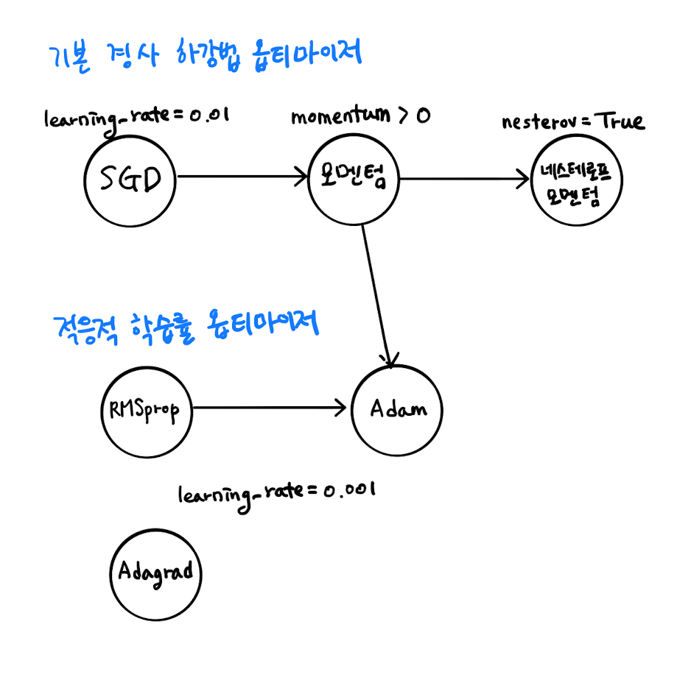

In [37]:
rmsprop = keras.optimizers.RMSprop() # 최적화
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['acc'])

In [38]:
model = keras.Sequential() # 딥러닝의 레이어 생성
model.add(keras.layers.Flatten(input_shape=(28,28))) # 입력층
model.add(keras.layers.Dense(100,activation='relu')) # 은닉층(렐루)
model.add(keras.layers.Dense(10,activation='softmax')) # 출력층(소프트맥스)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adagrad',loss='sparse_categorical_crossentropy',metrics=['acc'])
# 적응적 학습을 최적화 ( 에이다 그레드 )
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.5666 - loss: 1.4807
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.7471 - loss: 0.7907
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.7785 - loss: 0.6917
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.7956 - loss: 0.6416
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8059 - loss: 0.6096


In [41]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])
# 적응적 학습을 최적화(알엠에스프롭)
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8026 - loss: 0.5755
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8533 - loss: 0.4060
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8717 - loss: 0.3603
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8795 - loss: 0.3381
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8861 - loss: 0.3186


In [42]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
# adam : 모멘텀 최적화와 RMSprop의 장점을 접목한 기법! ( 대부분 adam을 사용함 )
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8872 - loss: 0.3062
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.8973 - loss: 0.2834
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9013 - loss: 0.2669
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9068 - loss: 0.2539
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - acc: 0.9108 - loss: 0.2423


In [44]:
model.evaluate(val_scaled,val_target) # 검증 성능 확인 87.60점! 굿

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8760 - loss: 0.3521


[0.3538845479488373, 0.878166675567627]